## Introduction/Problem

### Target Audience

Ronnie Gulliver is a multi-millionaire, international playboy, philanthropist, bodybuilder, two-time kite-surfing champion, and CEO of Gulliver Investment INC. He's looking to break up the monotony of the day-to-day and has decided to start fighting crime. He's decided that there's no better place to start than The Big Apple NEW YORK CITY!

### Background

I was recently picked up for a data science internship at Gulliver Investments INC and was selected to serve as Mr. Gulliver's personal data scientist. He told me that I have "a trustful face" _(whatever that means)_ and let me know about his plans to save NEW YORK CITY as... GULLMAN!!!! He showed me the costume and ran his plan down.

According to the FBI, crime rates in major cities within the United States have been increasing exponentially. While the violent crime rate average for the country was around 200 per 100,000 inhabitants in 1997, today the number sits in the high 700s. However, there are still some cities who face a higher than average crime rate - notably NEW YORK CITY!

Most sociologists view crime is a social problem, with many of the motivations between crimes committed can include things such as lack of police funding, issues with armed robberies, gang-related violence and more. But not in NEW YORK CITY! Crooked cops, corrupt politicians, gangs of themed thugs roaming the streets -- these are a constant problem in NEW YORK CITY! Well... not anymore! GULLMAN is ready to crack some skulls and stop crime through vigilante justice!

### Problem

GULLMAN doesn't want to start from the bottom. He wants to start in the most crime-ridden part of NEW YORK CITY. My job is to figure out where that is, so that GULLMAN can get to work.

## Data and Methodology

In order to determine the best location for GULLMAN to start fighting crime, I need to examine criminal statistics for NEW YORK CITY and explore neighborhoods to find the locations where crime is most prevalent. In order to do so, the following steps will be taken:

1.) Download and Explore Criminal Dataset for NYC (Source: https://data.cityofnewyork.us/resource/5uac-w243.json)

2.) Analyze the data by comparing crime statistics based on Borough, Precinct, Offense, and Locations using Matplotlib to graphically represent the data for easy consumption.

3.) Map out the area using Folium, so that GULLMAN can get started.

# Download and Explore the Datasets

### Download all the required dependencies in order to effectively analyze the information.

In [2]:
### I need to get all the required dependencies to make sure everything works

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# Seaborn because why not?
import seaborn as sns

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

# install BS4
!pip install beautifulsoup4
!conda install -c anaconda lxml --yes

from bs4 import BeautifulSoup # package for parsing HTML and XML documents
import csv # implements classes to read and write tabular data in CSV form

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be UPDATED:

  ca-certificates      anaconda::ca-certificates-2020.1.1-0 --> conda-forge::ca-certificates-2020.4.5.1-hecc5488_0

The following packages will be SUPERSEDED by a higher-priority channel:

  certifi               anaconda::certifi-2020.4.5.1-py36_0 --> conda-forge::certifi-2020.4.5.1-py36h9f0ad1d_0
  openssl               anaconda::openssl-1.1.1g-h7b6447c_0 --> conda-forge::openssl-1.1.1g-h516909a_0


Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - lxml


The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates    conda-forge::ca-certificates-2020.4.5~ --> anaconda::ca-certificates-2020.1.1-0
  cer

### __NEW YORK CITY Crime Statistics__
In order to find the data I need, I have to use the GULLMAN __CRIMEPUTER__ to hack the NYPD Database. From there, I can gather the dataset and create a DF to work from.

In [3]:
# source: https://data.cityofnewyork.us/resource/5uac-w243.json
df = pd.read_csv('NYC_Crime.csv')

#get a look and make sure everything works
df.head()

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,HADEVELOPT,HOUSING_PSA,JURISDICTION_CODE,JURIS_DESC,KY_CD,LAW_CAT_CD,LOC_OF_OCCUR_DESC,OFNS_DESC,PARKS_NM,PATROL_BORO,PD_CD,PD_DESC,PREM_TYP_DESC,RPT_DT,STATION_NAME,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,466502077,75,BROOKLYN,03/30/2020,17:30:00,03/31/2020,06:53:00,COMPLETED,NaN,NaN,0.0,N.Y. POLICE DEPT,341,MISDEMEANOR,OPPOSITE OF,PETIT LARCENY,NaN,PATROL BORO BKLYN NORTH,321.0,"LARCENY,PETIT FROM AUTO",STREET,03/31/2020,NaN,NaN,NaN,NaN,NaN,25-44,BLACK,M,1018496,178657,40.656991,-73.876574,"(40.65699087900003, -73.87657444799999)"
1,303191835,77,BROOKLYN,03/28/2020,19:30:00,03/28/2020,20:30:00,COMPLETED,NaN,NaN,0.0,N.Y. POLICE DEPT,104,FELONY,OPPOSITE OF,RAPE,NaN,PATROL BORO BKLYN NORTH,157.0,RAPE 1,STREET,03/30/2020,NaN,18-24,UNKNOWN,M,NaN,<18,UNKNOWN,F,1003606,185050,40.674583,-73.930222,"(40.67458330800008, -73.93022154099998)"
2,735488557,43,BRONX,03/29/2020,14:10:00,NaN,NaN,COMPLETED,NaN,NaN,0.0,N.Y. POLICE DEPT,341,MISDEMEANOR,INSIDE,PETIT LARCENY,NaN,PATROL BORO BRONX,333.0,"LARCENY,PETIT FROM STORE-SHOPL",DRUG STORE,03/29/2020,NaN,NaN,NaN,NaN,NaN,UNKNOWN,UNKNOWN,D,1019853,241853,40.830443,-73.871349,"(40.83044253800006, -73.871349147)"
3,315962428,40,BRONX,03/29/2020,07:10:00,03/29/2020,07:16:00,COMPLETED,NaN,NaN,0.0,N.Y. POLICE DEPT,341,MISDEMEANOR,INSIDE,PETIT LARCENY,NaN,PATROL BORO BRONX,333.0,"LARCENY,PETIT FROM STORE-SHOPL",GROCERY/BODEGA,03/29/2020,NaN,UNKNOWN,BLACK,M,NaN,25-44,WHITE HISPANIC,F,1007236,237260,40.817878,-73.916957,"(40.817877907000025, -73.91695668199996)"
4,165437868,114,QUEENS,03/27/2020,13:15:00,03/27/2020,14:00:00,COMPLETED,NaN,NaN,0.0,N.Y. POLICE DEPT,344,MISDEMEANOR,INSIDE,ASSAULT 3 & RELATED OFFENSES,NaN,PATROL BORO QUEENS NORTH,101.0,ASSAULT 3,OTHER,03/27/2020,NaN,NaN,NaN,NaN,NaN,45-64,BLACK,F,1002018,213258,40.752011,-73.935872,"(40.75201086000004, -73.93587196099996)"


### There's a lot of NULLDATA -- GULLMAN doesn't have time to waste! I need to clean up the data and figure out what we can use.

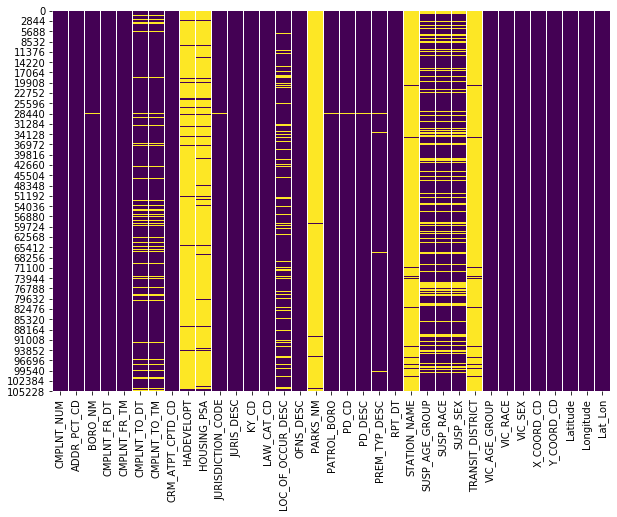

In [4]:
plt.figure(figsize=(10,7))
sns.heatmap(df.isnull(), cbar = False, cmap = 'viridis')

### There's a lot of junk, so I'm going to remove most of the columns we don't need. But first I need a list to double-check against the CMAP.

In [5]:
list(df)

['CMPLNT_NUM',
 'ADDR_PCT_CD',
 'BORO_NM',
 'CMPLNT_FR_DT',
 'CMPLNT_FR_TM',
 'CMPLNT_TO_DT',
 'CMPLNT_TO_TM',
 'CRM_ATPT_CPTD_CD',
 'HADEVELOPT',
 'HOUSING_PSA',
 'JURISDICTION_CODE',
 'JURIS_DESC',
 'KY_CD',
 'LAW_CAT_CD',
 'LOC_OF_OCCUR_DESC',
 'OFNS_DESC',
 'PARKS_NM',
 'PATROL_BORO',
 'PD_CD',
 'PD_DESC',
 'PREM_TYP_DESC',
 'RPT_DT',
 'STATION_NAME',
 'SUSP_AGE_GROUP',
 'SUSP_RACE',
 'SUSP_SEX',
 'TRANSIT_DISTRICT',
 'VIC_AGE_GROUP',
 'VIC_RACE',
 'VIC_SEX',
 'X_COORD_CD',
 'Y_COORD_CD',
 'Latitude',
 'Longitude',
 'Lat_Lon']

### I've got the list and now I'm going to drop the junk data I don't need.

In [6]:
df = df.drop(['CMPLNT_FR_DT',
 'CMPLNT_FR_TM',
 'CMPLNT_TO_DT',
 'CMPLNT_TO_TM',
 'CRM_ATPT_CPTD_CD',
 'HADEVELOPT',
 'HOUSING_PSA',
 'JURISDICTION_CODE',
 'JURIS_DESC',
 'KY_CD',
 'LAW_CAT_CD',
 'LOC_OF_OCCUR_DESC',
 'PARKS_NM',
 'PATROL_BORO',
 'PD_CD',
 'PD_DESC',
 'RPT_DT',
 'STATION_NAME',
 'SUSP_AGE_GROUP',
 'SUSP_RACE',
 'SUSP_SEX',
 'TRANSIT_DISTRICT',
 'VIC_AGE_GROUP',
 'VIC_RACE',
 'VIC_SEX',
 'X_COORD_CD',
 'Y_COORD_CD'], 1)

### Double check the information

In [7]:
df.head()

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,OFNS_DESC,PREM_TYP_DESC,Latitude,Longitude,Lat_Lon
0,466502077,75,BROOKLYN,PETIT LARCENY,STREET,40.656991,-73.876574,"(40.65699087900003, -73.87657444799999)"
1,303191835,77,BROOKLYN,RAPE,STREET,40.674583,-73.930222,"(40.67458330800008, -73.93022154099998)"
2,735488557,43,BRONX,PETIT LARCENY,DRUG STORE,40.830443,-73.871349,"(40.83044253800006, -73.871349147)"
3,315962428,40,BRONX,PETIT LARCENY,GROCERY/BODEGA,40.817878,-73.916957,"(40.817877907000025, -73.91695668199996)"
4,165437868,114,QUEENS,ASSAULT 3 & RELATED OFFENSES,OTHER,40.752011,-73.935872,"(40.75201086000004, -73.93587196099996)"


### Looks good. Just going to pair down the information in a format that I can easily consume by reorganizing the information and reorganizing the information.

In [8]:
df.rename(columns={'ADDR_PCT_CD': 'Precinct', 
                   'BORO_NM': 'Borough', 
                   'OFNS_DESC': 'Offense',
                   'PREM_TYP_DESC': 'Location'}, inplace=True)
df.head()

,CMPLNT_NUM,Precinct,Borough,Offense,Location,Latitude,Longitude,Lat_Lon
0,466502077,75,BROOKLYN,PETIT LARCENY,STREET,40.656991,-73.876574,"(40.65699087900003, -73.87657444799999)"
1,303191835,77,BROOKLYN,RAPE,STREET,40.674583,-73.930222,"(40.67458330800008, -73.93022154099998)"
2,735488557,43,BRONX,PETIT LARCENY,DRUG STORE,40.830443,-73.871349,"(40.83044253800006, -73.871349147)"
3,315962428,40,BRONX,PETIT LARCENY,GROCERY/BODEGA,40.817878,-73.916957,"(40.817877907000025, -73.91695668199996)"
4,165437868,114,QUEENS,ASSAULT 3 & RELATED OFFENSES,OTHER,40.752011,-73.935872,"(40.75201086000004, -73.93587196099996)"


In [9]:
#Better! Just need to reorder the columns!
df = df[['Borough','Precinct','Location','Offense','Latitude','Longitude','Lat_Lon']]
df.head()

,Borough,Precinct,Location,Offense,Latitude,Longitude,Lat_Lon
0,BROOKLYN,75,STREET,PETIT LARCENY,40.656991,-73.876574,"(40.65699087900003, -73.87657444799999)"
1,BROOKLYN,77,STREET,RAPE,40.674583,-73.930222,"(40.67458330800008, -73.93022154099998)"
2,BRONX,43,DRUG STORE,PETIT LARCENY,40.830443,-73.871349,"(40.83044253800006, -73.871349147)"
3,BRONX,40,GROCERY/BODEGA,PETIT LARCENY,40.817878,-73.916957,"(40.817877907000025, -73.91695668199996)"
4,QUEENS,114,OTHER,ASSAULT 3 & RELATED OFFENSES,40.752011,-73.935872,"(40.75201086000004, -73.93587196099996)"


### Now that I have the data, it's time to take a look at the areas with the highest crime rate. Since I don't want to wander aimlessly, I'm going to chart crime data by Borough, Precinct, Type, and Location in order to narrow down the top place to fight crime.

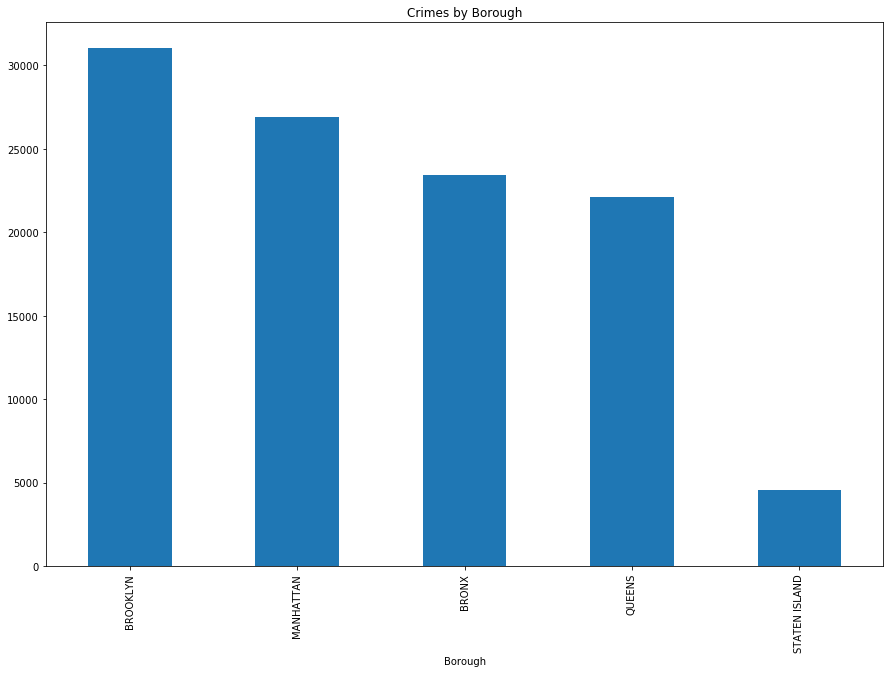

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

groups = df.groupby("Borough")["Borough"].count()
groups = groups.sort_values(ascending=False)
plt.figure(figsize=(15,10))
groups.plot(kind='bar', title="Crimes by Borough")

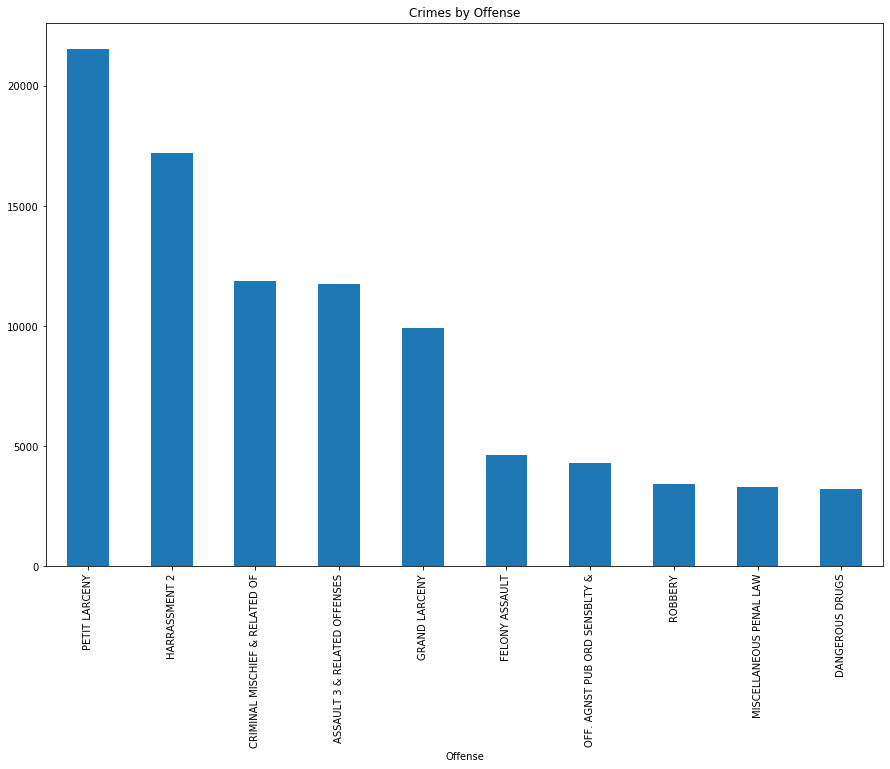

In [11]:
#Theres a LOT of crime in NYC, so I'll narrow it down to the TOP 10 criminal-offenses
%matplotlib inline
import matplotlib.pyplot as plt

groups = df.groupby("Offense")["Offense"].count()
groups = groups.sort_values(ascending=False)[:10]
plt.figure(figsize=(15,10))
groups.plot(kind='bar', title="Crimes by Offense")

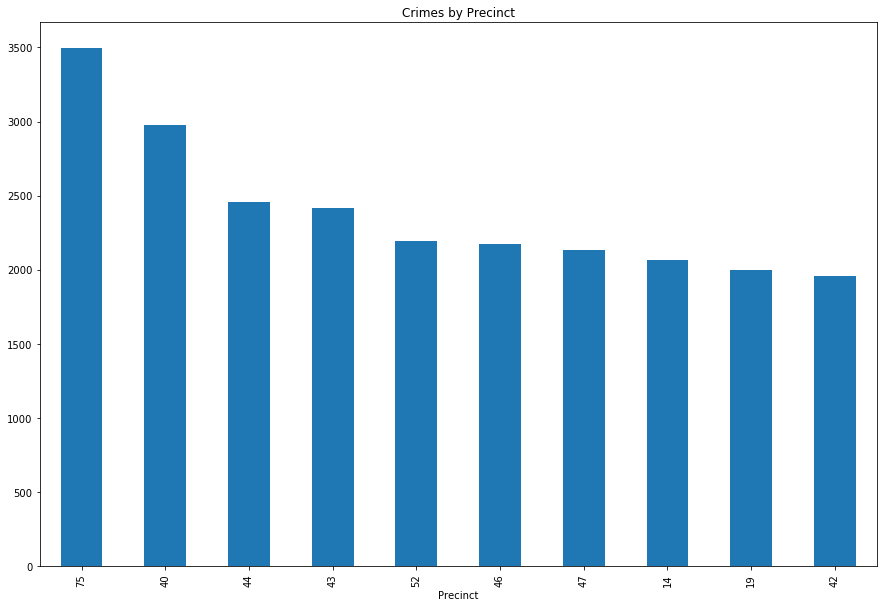

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

groups = df.groupby("Precinct")["Precinct"].count()
groups = groups.sort_values(ascending=False)[:10]
plt.figure(figsize=(15,10))
groups.plot(kind='bar', title="Crimes by Precinct")

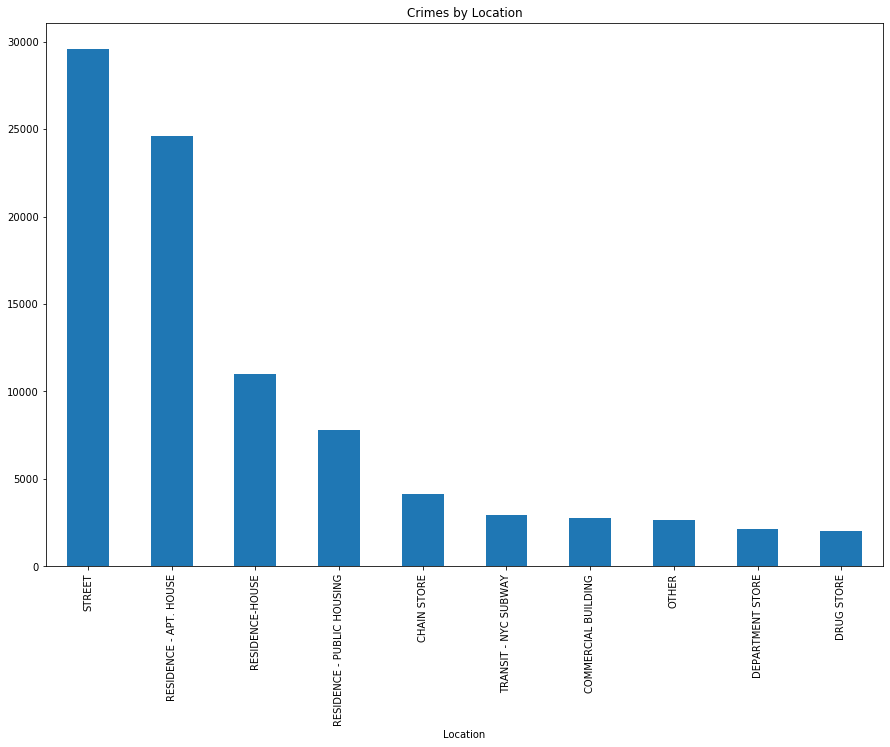

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

groups = df.groupby("Location")["Location"].count()
groups = groups.sort_values(ascending=False)[:10]
plt.figure(figsize=(15,10))
groups.plot(kind='bar', title="Crimes by Location")

## Analysis
### Based on all the information, the best place for GULLMAN to fight crime is in __Brooklyn__ in the __75th Precinct__ on __the STREET__ to stop __PETTY LARCENY__. 

### Now, all I need to do is figure out where this place is on a map! I need to figure out where the 75th Precinct is located _(thanks GOOGLE)_ and convert it to LAT/LONG.

In [14]:
address = '1000 Sutter Avenue, Brooklyn, NY, 11208-3553'

geolocator = Nominatim(user_agent="GULLMAN")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of the 75th Precinct are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of the 75th Precinct are 40.67117035, -73.88145873279599.


### Now that I've got the LAT/LONG, I can put it on a map with a general area circled that GULLMAN can patrol.

In [15]:
crime_map = folium.Map(location=[latitude, longitude], zoom_start=12, tiles="CartoDB dark_matter")

folium.CircleMarker(
    location = [latitude, longitude], 
    popup= "BAD GUY CENTRAL!", 
    color="red",
    radius= 50,
    fill = True).add_to(crime_map)
crime_map

## Discussion
I have concluded that fighting __Petty Larceny on the Streets of Brooklyn’s 75th Precinct__ is the best place for GULLMAN to start his vigilante crime patrols and make a name for himself. 

or

Or GULLMAN can revert to regular old Ronnie Gulliver, so that he can continue running a multi-million dollar portfolio and driving his expensive car.

## Conclusion
Only Ronnie Gulliver knows what Ronnie Gulliver wants. While the information was presented in a clear and concise manner, there are several variables that are left to examine. Given the initial request, I think this product satisfies all requirements, while leaving room to explore other options. If anything, the information shows me where I can improve as a data scientist. And I am ready for the challenge.